In [1]:
import numpy as np
import pandas as pd
from scipy import stats
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras 
from tensorflow.keras import models
from tensorflow.keras import layers
keras.__version__

'2.2.4-tf'

In [3]:
data_10000 = pd.read_csv('training_fullclean.csv',nrows=400000)

/gpfs/data/data2040/tf2/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (22) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
data_20000 = pd.read_csv('testing_fullclean.csv',nrows=400000)

In [5]:
#rawData = pd.read_csv('datathon_propattributes.csv')
#slicedData = rawData[:100]
data = data_10000
#data = data.drop([])
#data['sale_amt'].describe()

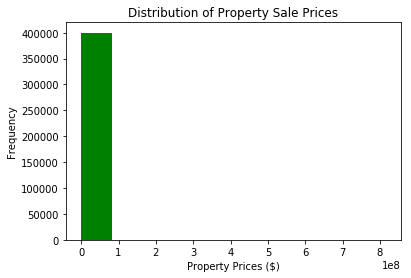

In [6]:
#Distribution of Property Sale Prices
plt.hist(data.sale_amt, facecolor = 'green')
plt.xlabel('Property Prices ($)')
plt.ylabel('Frequency')
plt.title('Distribution of Property Sale Prices')
plt.show()

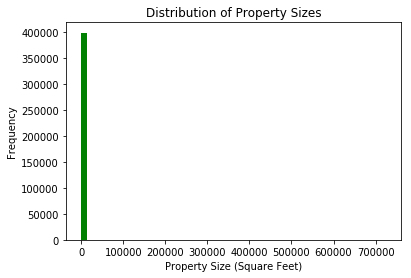

In [7]:
#Distribution of Property Square Feet
plt.hist(data.building_square_feet, 50, facecolor = 'green')
plt.xlabel('Property Size (Square Feet)')
plt.ylabel('Frequency')
plt.title('Distribution of Property Sizes')
plt.show()

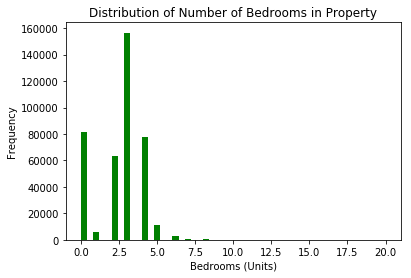

In [8]:
#Distribution of Number of Bedrooms in Property
plt.hist(data.bedrooms, 50, facecolor = 'green')
plt.xlabel('Bedrooms (Units)')
plt.ylabel('Frequency')
plt.title('Distribution of Number of Bedrooms in Property')
plt.show()

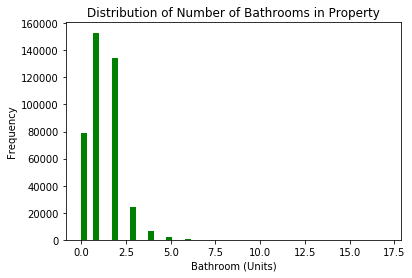

In [9]:
#Distribution of Number of Bathrooms in Property
plt.hist(data.total_baths_calculated, 50, facecolor = 'green')
plt.xlabel('Bathroom (Units)')
plt.ylabel('Frequency')
plt.title('Distribution of Number of Bathrooms in Property')
plt.show()

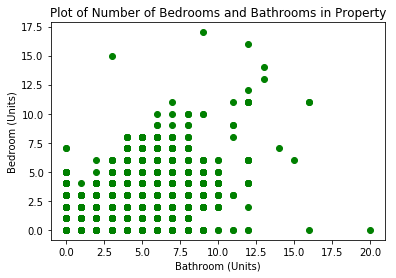

In [10]:
#Scatter Plot of Number of Bedrooms and Bathrooms in Property
plt.scatter(data.bedrooms,data.total_baths_calculated,facecolor = 'green')
plt.xlabel('Bathroom (Units)')
plt.ylabel('Bedroom (Units)')
plt.title('Plot of Number of Bedrooms and Bathrooms in Property')
plt.show()

# Neural Nets Section

## Train_val split

In [11]:
#Loaded only 400,000 train and test data

In [12]:
data_10000['land_square_footage'].describe()

count    4.000000e+05
mean     6.840550e+04
std      8.082257e+05
min      0.000000e+00
25%      3.485000e+03
50%      9.017000e+03
75%      2.193900e+04
max      3.983126e+08
Name: land_square_footage, dtype: float64

In [13]:
y = data_10000.sale_amt
yy = data_20000.sale_amt
#X = data_10000[['prop_zip_code','land_square_footage',
#                           'building_square_feet','effective_year_built',
#                          'bedrooms','total_baths_calculated','air_conditioning_Yes',
#                           'condition_Excellent','heating_type_Yes']]
#df[((df.B - df.B.mean()) / df.B.std()).abs() < 3]
X = data_10000.drop(columns = ['sale_amt','stories_cd','air_conditioning_Evaporative Cooler'])
XX = data_20000.drop(columns = ['sale_amt','stories_cd','air_conditioning_Packaged Unit',
                                'air_conditioning_Refrigeration','garage_type_Paved/Surfaced',
                                'roof_type_IRR/CATHEDRAL'])
#X.drop(X.columns[cols],axis=1,inplace=True)
#X = tf.keras.utils.normalize(X)
#X.head

In [14]:
ls1 = list(X)

In [15]:
ls2 = list(XX)
ls3 = np.setdiff1d(ls1,ls2, assume_unique=True)
print(ls3)

[]


In [16]:
#list(X)
y = np.log1p(y)
X = np.log1p(X)
yy = np.log1p(yy)
XX = np.log1p(XX)

In [17]:
X.isnull().values.any()

False

In [18]:
XX.isnull().values.any()

False

In [19]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)
X_test, _, y_test, _ = train_test_split(XX, yy, test_size = 0, random_state=42)

mean = X_train.mean(axis=0)
X_train -= mean
std = X_train.std(axis=0)
X_train /= std

X_val -= mean
X_val /= std

In [20]:
#train_data.shape
X_train.shape
#y_train.shape

(280000, 175)

In [21]:
X_train.shape[1]

175

In [22]:
#val_data.shape
X_val.shape
#y_val.shape

(120000, 175)

In [23]:
X_test.shape

(400000, 175)

In [30]:
def build_model0():
    model0 = models.Sequential()
    model0.add(keras.layers.Dense(512, activation='relu',
                           input_shape=(X_train.shape[1],)))
    #model.add(keras.layers.Dense(256, activation='relu'))
    model0.add(keras.layers.Dropout(0.1))
    model.add(keras.layers.Dense(256, activation='relu'))
    model.add(keras.layers.Dense(256, activation='relu'))
    #model.add(keras.layers.Dense(256, activation='relu'))
    #model.add(keras.layers.Dense(128, activation='relu'))
    model0.add(keras.layers.Dense(128, activation='relu'))
    model0.add(keras.layers.Dense(128, activation='relu'))
    model0.add(keras.layers.Dense(64, activation='relu'))
    #model0.add(keras.layers.Dense(64, activation='relu'))
    #model.add(keras.layers.Dense(32, activation='relu'))
    #model0.add(keras.layers.Dense(32, activation='relu'))
    model0.add(keras.layers.Dense(1))
    
    model0.compile(optimizer='adam', loss='mse', metrics=['mae'])

    return model0

In [24]:
def build_model():
    model = models.Sequential()
    model.add(keras.layers.Dense(256, activation='relu',
                           input_shape=(X_train.shape[1],)))
    #model.add(keras.layers.Dense(256, activation='relu'))
    model.add(keras.layers.Dropout(0.1))
    #model.add(keras.layers.Dense(256, activation='relu'))
    #model.add(keras.layers.Dense(256, activation='relu'))
    #model.add(keras.layers.Dense(256, activation='relu'))
    #model.add(keras.layers.Dense(128, activation='relu'))
    model.add(keras.layers.Dense(128, activation='relu'))
    model.add(keras.layers.Dense(128, activation='relu'))
    model.add(keras.layers.Dense(64, activation='relu'))
    model.add(keras.layers.Dense(64, activation='relu'))
    #model.add(keras.layers.Dense(32, activation='relu'))
    model.add(keras.layers.Dense(32, activation='relu'))
    model.add(keras.layers.Dense(1))
    
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])

    return model

In [25]:
# fix random seed
seed = 123
np.random.seed(seed)

In [31]:
# Build the Keras model (already compiled)
model0 = build_model0()
# Train the model (in silent mode, verbose=0)
history = model0.fit(X_train, y_train, epochs=20, batch_size=16, validation_data=(X_val, y_val))

Train on 280000 samples, validate on 120000 samples
Epoch 1/20
280000/280000 [==============================] - 80s 287us/sample - loss: 0.9650 - mae: 0.6663 - val_loss: 0.8940 - val_mae: 0.6463
Epoch 2/20
280000/280000 [==============================] - 81s 290us/sample - loss: 0.8198 - mae: 0.5996 - val_loss: 0.6973 - val_mae: 0.4781
Epoch 3/20
280000/280000 [==============================] - 86s 307us/sample - loss: 0.7635 - mae: 0.5582 - val_loss: 0.7109 - val_mae: 0.4800
Epoch 4/20
280000/280000 [==============================] - 88s 315us/sample - loss: 0.7248 - mae: 0.5272 - val_loss: 0.6858 - val_mae: 0.5039
Epoch 5/20
280000/280000 [==============================] - 85s 305us/sample - loss: 0.7048 - mae: 0.5072 - val_loss: 0.6840 - val_mae: 0.4897
Epoch 6/20
280000/280000 [==============================] - 86s 306us/sample - loss: 0.6939 - mae: 0.4974 - val_loss: 0.6568 - val_mae: 0.4717
Epoch 7/20
280000/280000 [==============================] - 85s 303us/sample - loss: 0.686

In [32]:
model0.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 512)               90112     
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 128)               65664     
_________________________________________________________________
dense_11 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_12 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 65        
Total params: 180,609
Trainable params: 180,609
Non-trainable params: 0
________________________________________________

In [33]:
# Build the Keras model (already compiled)
model = build_model()
# Train the model (in silent mode, verbose=0)
historyy = model.fit(X_train, y_train, epochs=20, batch_size=16, validation_data=(X_val, y_val))

Train on 280000 samples, validate on 120000 samples
Epoch 1/20
280000/280000 [==============================] - 71s 253us/sample - loss: 1.0137 - mae: 0.6769 - val_loss: 0.9326 - val_mae: 0.7349
Epoch 2/20
280000/280000 [==============================] - 70s 248us/sample - loss: 0.7882 - mae: 0.5722 - val_loss: 0.7643 - val_mae: 0.6012
Epoch 3/20
280000/280000 [==============================] - 73s 261us/sample - loss: 0.7336 - mae: 0.5294 - val_loss: 0.6888 - val_mae: 0.4917
Epoch 4/20
280000/280000 [==============================] - 75s 267us/sample - loss: 0.7093 - mae: 0.5098 - val_loss: 0.6565 - val_mae: 0.4661
Epoch 5/20
280000/280000 [==============================] - 74s 264us/sample - loss: 0.6968 - mae: 0.4988 - val_loss: 0.6631 - val_mae: 0.4851
Epoch 6/20
280000/280000 [==============================] - 74s 264us/sample - loss: 0.6857 - mae: 0.4905 - val_loss: 0.6970 - val_mae: 0.5646
Epoch 7/20
280000/280000 [==============================] - 76s 271us/sample - loss: 0.679

In [35]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 256)               45056     
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_16 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_17 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_18 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_19 (Dense)             (None, 32)               

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

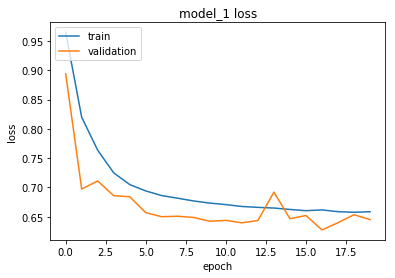

In [57]:
# summarize history for loss of model 0
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model_1 loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

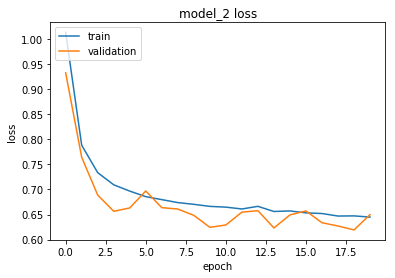

In [58]:
# summarize history for loss of model
plt.plot(historyy.history['loss'])
plt.plot(historyy.history['val_loss'])
plt.title('model_2 loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [38]:
# Evaluate the model on the validation data
val_mse, val_mae = model.evaluate(X_val, y_val)

120000/120000 [==============================] - 6s 50us/sample - loss: 0.6498 - mae: 0.5034


In [53]:
#results for model0
results0 = model0.evaluate(X_val, y_val)
results

120000/120000 [==============================] - 7s 56us/sample - loss: 0.6450 - mae: 0.4729


[0.6450105178395907, 0.47294]

In [54]:
#results for model
results = model.evaluate(X_val, y_val)
results

120000/120000 [==============================] - 6s 52us/sample - loss: 0.6498 - mae: 0.5034


[0.6498474169433117, 0.50336945]

In [55]:
preds = model.predict(X_test)

In [41]:
predss = [preds[i][0] for i in range(len(preds))]
predss = np.array(predss)

In [42]:
predss_exp = np.exp(predss)-1

In [43]:
predss_exp

array([364664.22 , 103457.47 ,  79795.3  , ..., 100737.44 ,  19357.074,
        27851.162], dtype=float32)

In [44]:
y_test = np.array(y_test)

In [45]:
y_test_exp = np.exp(y_test) -1

In [46]:
y_test

array([13.74294094, 11.69525536, 11.37367489, ..., 11.40757606,
       10.46313191,  9.6091836 ])

In [47]:
accuracy = ((predss-y_test)/y_test)
#accuracy = accuracy_score(y_val, predss)
accuracy.mean()

-0.003947437892316003

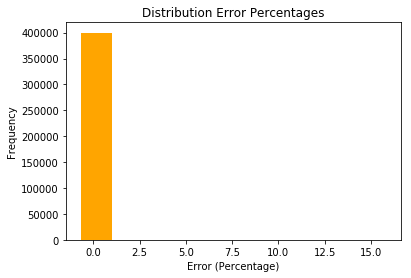

In [48]:
#Distribution of 
plt.hist(accuracy, facecolor = 'orange')
plt.xlabel('Error (Percentage)')
plt.ylabel('Frequency')
plt.title('Distribution Error Percentages')
plt.show()

In [49]:
print('0th percentile is:', np.quantile(accuracy,0))
print('25th percentile is:', np.quantile(accuracy,.25))
print('50th percentile is:', np.quantile(accuracy,.50))
print('75th percentile is:', np.quantile(accuracy,.75))
print('99th percentile is:', np.quantile(accuracy,.99))
print('100th percentile is:', np.quantile(accuracy,1))

0th percentile is: -0.6554286205556946
25th percentile is: -0.03221797642180115
50th percentile is: -0.018478143802280238
75th percentile is: -0.0034936719958877645
99th percentile is: 0.4024057916504097
100th percentile is: 15.794773149438612


In [50]:
accuracy_exp = ((predss_exp-y_test_exp)/y_test_exp)
#accuracy = accuracy_score(y_val, predss)
#accuracy_exp.mean()

In [51]:
#evaluate your model on the test set
#results = model.evaluate(X_test, y_test)

In [95]:
#run this to see your mae
#results[1]